## Married at First Sight (Analysis)


The Lifetime reality television show and social experiment, Married at First Sight, features men and women who sign up to marry a complete stranger they've never met before. Experts pair couples based on tests and interviews. After marriage, couples have only a few short weeks together to decide if they want to stay married or get a divorce. There have been 10 full seasons so far which provides interesting data to look at what factors may or may not play a role in their decisions at the end of eight weeks as well as longer-term outcomes since the show aired.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/married-at-first-sight/mafs.csv


Now that we have the libraries in place, let us import the data and see how it looks!

In [2]:
Data = pd.read_csv('../input/married-at-first-sight/mafs.csv')
Data.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


This looks good. Now let us see the dimensions and our variables in the data set!


In [3]:
Data.shape #Dimensions

(68, 17)

In [4]:
Data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Couple                68 non-null     int64 
 1   Season                68 non-null     int64 
 2   Location              68 non-null     object
 3   Name                  68 non-null     object
 4   Age                   68 non-null     int64 
 5   Gender                68 non-null     object
 6   Occupation            68 non-null     object
 7   Decision              68 non-null     object
 8   Status                68 non-null     object
 9   DrPepperSchwartz      68 non-null     int64 
 10  DrLoganLevkoff        68 non-null     int64 
 11  DrJosephCilona        68 non-null     int64 
 12  ChaplainGregEpstein   68 non-null     int64 
 13  PastorCalvinRoberson  68 non-null     int64 
 14  RachelDeAlto          68 non-null     int64 
 15  DrJessicaGriffin      68 non-null     int6

So, we do see that our data has 68 observations, and 17 dimensions. All the names of the variables are written in the info output. Seems good so far.


Let us make a copy of the data and work on it rather than using the original data.

In [5]:
my_data = Data.copy()

Now let us see some descriptive statistics about our dataset to get an idea of the values we're dealing with.


In [6]:
print(my_data.describe(include=['O']))
print(my_data.describe()) #Descriptive Statistics

                                     Location           Name Gender  \
count                                      68             68     68   
unique                                      9             68      2   
top     New York City and Northern New Jersey  Derek Sherman      F   
freq                                       12              1     34   

                        Occupation Decision    Status  
count                           68       68        68  
unique                          68        2         2  
top     Mental Health Professional      Yes  Divorced  
freq                             1       48        50  
          Couple     Season        Age  DrPepperSchwartz  DrLoganLevkoff  \
count  68.000000  68.000000  68.000000              68.0       68.000000   
mean   17.500000   5.941176  29.970588               1.0        0.264706   
std     9.883652   2.991941   3.195008               0.0        0.444457   
min     1.000000   1.000000  24.000000               1.0    

We don't see any misssing values so that seems fine. A key point to note that 25 of the couples were divorced after getting married which is quite high! Other descriptive interpretation can be made from the output above.

We also find out that DrPepperSchwartz was always present no matter what. So, it is not quite significant for our analysis as it is constant. So let us drop that variable.

In [7]:
my_data.drop(['DrPepperSchwartz'], axis=1,inplace = True)
my_data.columns

Index(['Couple', 'Season', 'Location', 'Name', 'Age', 'Gender', 'Occupation',
       'Decision', 'Status', 'DrLoganLevkoff', 'DrJosephCilona',
       'ChaplainGregEpstein', 'PastorCalvinRoberson', 'RachelDeAlto',
       'DrJessicaGriffin', 'DrVivianaColes'],
      dtype='object')

Done! Let us find the important variables that might be useful for us!

In [8]:
my_data.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,0,0,0,0


In order to predict if a couple will stay married or not, features like Name, Occupation don't matter much. So, for the sake of this problem, let us drop those columns!

In [9]:
my_data.drop(['Name','Occupation'], axis=1,inplace = True)
my_data.columns

Index(['Couple', 'Season', 'Location', 'Age', 'Gender', 'Decision', 'Status',
       'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein',
       'PastorCalvinRoberson', 'RachelDeAlto', 'DrJessicaGriffin',
       'DrVivianaColes'],
      dtype='object')

Now let us convert the categorical variables into numerical ones!

In [10]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
my_data['Gender'] = enc.fit_transform(my_data['Gender'])
my_data['Status'] = enc.fit_transform(my_data['Status'])
my_data['Decision'] = enc.fit_transform(my_data['Decision'])

Great! After careful consideration, the location where the show takes place isn't something that really concerns how well the marriage is going to go. Let us drop that as well!

In [11]:
my_data.drop(['Location'], axis=1,inplace = True)
my_data.head()

,Couple,Season,Age,Gender,Decision,Status,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,27,0,1,1,1,1,1,0,0,0,0
1,1,1,31,1,1,1,1,1,1,0,0,0,0
2,2,1,26,0,1,0,1,1,1,0,0,0,0
3,2,1,27,1,1,0,1,1,1,0,0,0,0
4,3,1,33,0,0,0,1,1,1,0,0,0,0


Perfect. Let us see the correlations between variables to get a better idea!

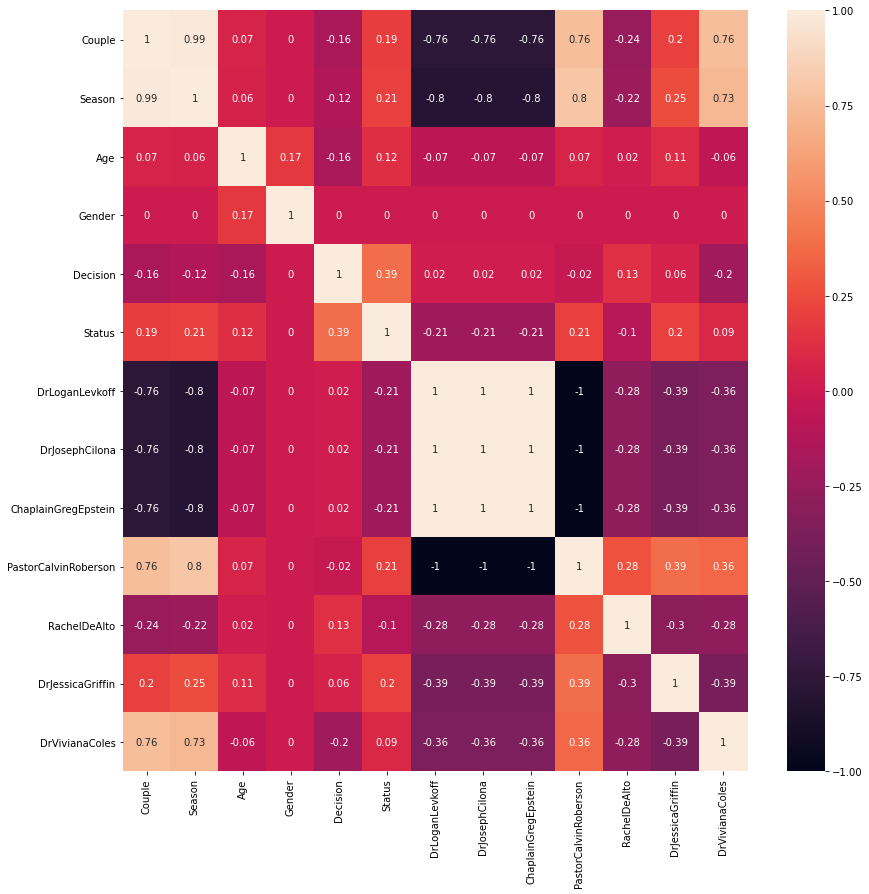

In [12]:
plt.figure(figsize=(14,14))
corr_matrix = my_data.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

We do see some strong correlations in this plot. Let us just see the data for the final time before making a model to run based on this. A big strong correlations can be seen for the variables Couple and Season, as well between them. So we will consider them in our analysis when we train the model on our data.

Let X be the predictors from the data and Y be the response variable aka Status.

In [13]:
X = my_data.iloc[:, [3,4,6,7,8,9,10,11,12]].values
y = my_data.iloc[:,5].values

Now let us split the data into training and testing data. Test data will be 30% of the total data which sounds quite reasonable.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Perfect! Now let us try two different methods. A good method for this task would be a Random Forest Classifier. The other would be deploying a simple Artificial Neural Network. But first, Let us try a SVM to see if it good results to check the linearity of the data.

In [15]:
#Support Vector Classifier

from sklearn.svm import SVC 
classifier=SVC(kernel='linear',random_state=0)
#Fitting training data and making predictions on test data
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

Great, now let us see how well our classifier does! 

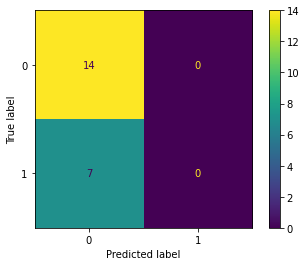

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

Not bad! But it can surely be better. We get all 0's right but not the 1's. I'm sure we could do a better model. Let's try a Random Forest Classifier.

In [17]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

#Fitting training data and making predictions on test data

classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

Let's see how our classifier performs!

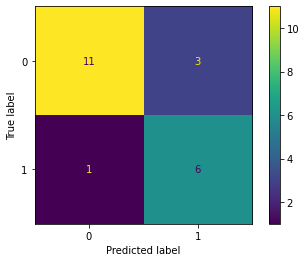

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

Oh we did make a few false postives and but in overall sense, we do better than a SVM. Let us see the AUC Score!

In [19]:
probs = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs[:,1])

0.8418367346938775

84%! Pretty Decent isn't it? Now let us try a deep learning model which can be of use as well. Here I try an Artifical Neural Network for this task.

In [20]:
#Importing the basic libraries and components

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

#Building the classifier and adding the layers

classifier = Sequential()
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu', input_dim=9))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Using TensorFlow backend.


Done! Now let us compile the clasiifier, and set the optimizer,loss function and the metric for evaluation.

In [21]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Awesome! Now we're ready to make predictions on the data. Hope we do get a good result!

In [22]:
#Fitting the data to the training set and making predictions on the test set
classifier.fit(X_train,y_train,batch_size=1, epochs=100) 
y_pred=classifier.predict(X_test)

Epoch 1/100
47/47 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.6596
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.7660
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.7660
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7660
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7660
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7660
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7660
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7660
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7660
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7660
Epoch 11/

In [23]:
y_pred #Probabilities

array([[0.41220462],
       [0.16249727],
       [0.21278621],
       [0.16236174],
       [0.4122273 ],
       [0.2129531 ],
       [0.41220462],
       [0.36441883],
       [0.3646496 ],
       [0.1771781 ],
       [0.16236174],
       [0.4122273 ],
       [0.17732334],
       [0.36441883],
       [0.36441883],
       [0.41220462],
       [0.05236365],
       [0.17732334],
       [0.16236174],
       [0.12826246],
       [0.1771781 ]], dtype=float32)

Seems okay so far. Now that we have probabilities, let us convert them to 1's and 0's and see how well did we do.

In [24]:
y_pred1 = (y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
cm

array([[14,  0],
       [ 7,  0]])

Great! We do get a similar result as the SVM. Let us see the AUC Score!

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7806122448979592

85% is awesome. So in conclusion, we built two predictive models, using different methodologies to predict the status of marriages after 8 weeks for these contestants. A deep learning approach resulted in an AUC score of 85% while RF Classifier gave us 84%.